In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from data_helpers import *

In [2]:
target_path = os.path.abspath(os.path.join(os.getcwd(),'target_predictions'))
if not os.path.exists(target_path):
    os.makedirs(target_path)

get_files('Mexico',target_path)
cummulative = get_cummulative('Casos_Diarios_Estado_Nacional_Defunciones_20200604.csv')
discrete = get_discrete('Casos_Diarios_Estado_Nacional_Defunciones_20200604.csv')

In [6]:
pred = 'target_predictions/Mexico_04-07.csv'

In [ ]:
pred[-6:-4]

In [ ]:
calendar.month_name[int(pred[-9:-7])]

In [ ]:
preds = pd.read_csv(pred)

In [ ]:
preds.keys()

In [30]:
def get_data(cummulative,discrete,prediction):
    
    if not os.path.exists('imgs/cummulative'):
        os.makedirs('imgs/cummulative')
    if not os.path.exists('imgs/discrete'):
        os.makedirs('imgs/discrete')
    
    pred = pd.read_csv(prediction)
    pred['dates'] = pd.to_datetime(pred['date'].copy())
    pred = pred.drop('date',axis=1)
    pred = pred.set_index('dates',drop=True)
        
    min_date = min(min(pred.index), min(cummulative['dates']))
    max_date = max(max(pred.index), max(cummulative['dates']))
    
    index = pd.date_range(start = min_date, end = max_date)
    
    database = {
        'index':index,
        'cummulative': [],
        'discrete': [],
        'pred_cummulative_low':[],
        'pred_cummulative_mean':[],
        'pred_cummulative_upper':[],
        'pred_discrete_low': [],
        'pred_discrete_mean':[],
        'pred_discrete_upper':[],
    }
        
    for date in index:
        try:
            database['cummulative'].append(cummulative[cummulative['dates'] == date].deaths.values[0])
        except:
            database['cummulative'].append(np.nan)
        try:
            
            database['discrete'].append(discrete[discrete.index == date].deaths.values[0])
        except:
            database['discrete'].append(np.nan)
        try:
            database['pred_cummulative_low'].append(pred[pred.index == date].predicted_total_deaths_lower.values[0])
        except:
            database['pred_cummulative_low'].append(np.nan)
        try:
            database['pred_cummulative_mean'].append(pred[pred.index == date].predicted_total_deaths_mean.values[0])
        except:
            database['pred_cummulative_mean'].append(np.nan)
        try:
            database['pred_cummulative_upper'].append(pred[pred.index == date].predicted_total_deaths_upper.values[0])
        except:
            database['pred_cummulative_upper'].append(np.nan)
        try:
            database['pred_discrete_low'].append(pred[pred.index == date].predicted_deaths_lower.values[0])
        except:
            database['pred_discrete_low'].append(np.nan)
        try:
            database['pred_discrete_mean'].append(pred[pred.index == date].predicted_deaths_mean.values[0])
        except:
            database['pred_discrete_mean'].append(np.nan)
        try:
            database['pred_discrete_upper'].append(pred[pred.index == date].predicted_deaths_upper.values[0])
        except:
            database['pred_discrete_upper'].append(np.nan)
    
    plt.close('all')
    plt.rcParams["figure.figsize"] = (15,6)
    plt.plot(database['index'],database['discrete'], label=f'real deaths {max(cummulative.deaths)}', linewidth=5, color = 'black')
    plt.plot(database['index'],database['pred_discrete_low'],   label = f'pred deaths: {database["pred_cummulative_low"][-1]}')
    plt.plot(database['index'],database['pred_discrete_mean'],  label = f'pred deaths: {database["pred_cummulative_mean"][-1]}')
    plt.plot(database['index'],database['pred_discrete_upper'], label = f'pred deaths: {database["pred_cummulative_upper"][-1]}')
    
    plt.fill_between(database['index'], database['pred_discrete_low'], database['pred_discrete_upper'], color='b', alpha=.1)
    
    plt.title(f' predicted deaths for September: {sum(database["pred_discrete_mean"]) }', fontsize=25)
    plt.suptitle(f'{calendar.month_name[int(prediction[-9:-7])]}-{prediction[-6:-4]}', fontsize=20,ha='left')
    plt.ylabel('Deaths for Covid19')
    plt.legend(fontsize=20,loc='upper left')
    plt.xlabel(f'Real deaths: {max(cummulative.deaths)}', fontsize = 18)
            
    plt.savefig(f'imgs/discrete/{prediction[-9:-4]}.jpg')
    
    plt.close('all')
    plt.rcParams["figure.figsize"] = (15,6)
    plt.plot(database['index'],database['cummulative'], label=f'real deaths {max(cummulative.deaths)}', linewidth=5, color = 'black')
    plt.plot(database['index'],database['pred_cummulative_low'],   label = f'pred deaths: {database["pred_cummulative_low"][-1]}')
    plt.plot(database['index'],database['pred_cummulative_mean'],  label = f'pred deaths: {database["pred_cummulative_mean"][-1]}')
    plt.plot(database['index'],database['pred_cummulative_upper'], label = f'pred deaths: {database["pred_cummulative_upper"][-1]}')
    
    plt.fill_between(database['index'], database['pred_cummulative_low'], database['pred_cummulative_upper'], color='b', alpha=.1)
    
    plt.xlabel(f'Real deaths: {max(cummulative.deaths)}', fontsize = 18)
    plt.ylabel('Deaths for Covid19')
    plt.title(f' predicted deaths: {database["pred_cummulative_mean"][-1]}', fontsize=25)
    plt.suptitle(f'{calendar.month_name[int(prediction[-9:-7])]}-{prediction[-6:-4]}', fontsize=20,ha='left')
    plt.legend(fontsize=16,loc='upper left')

    
    plt.savefig(f'imgs/cummulative/{prediction[-9:-4]}.jpg')
    
    return database
    

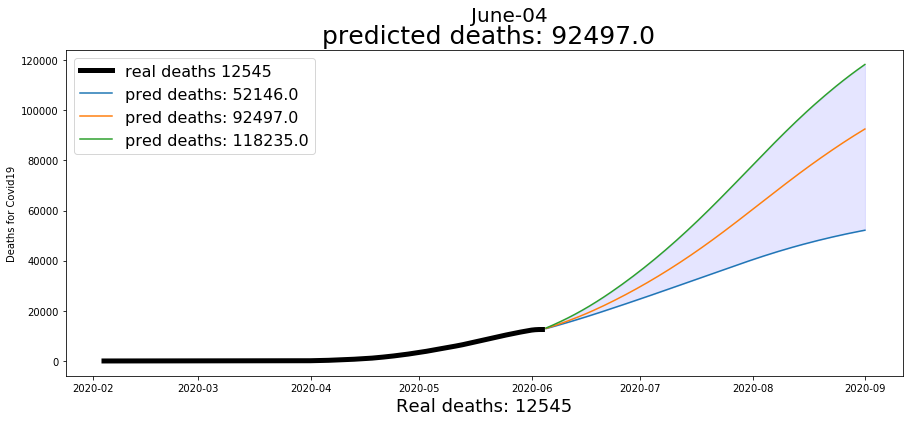

In [32]:
for file in os.listdir('target_predictions'):
    get_data(cummulative,discrete,os.path.join('target_predictions',file))

In [ ]:
database['cummulative'][-1]

In [ ]:
plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(database['index'],database['cummulative'], label='real deaths')
plt.plot(database['index'],database['pred_cummulative_low'], label = 'predicted mean')
plt.plot(database['index'],database['pred_cummulative_mean'], label = 'predicted low')
plt.plot(database['index'],database['pred_cummulative_upper'], label = 'predicted upper')

plt.legend()

In [36]:
import imageio
images = []
for filename in os.listdir('imgs/cummulative'):
    images.append(imageio.imread(os.path.join('imgs/cummulative',filename)))
imageio.mimsave('cummulative.gif', images, duration=0.3)

In [37]:
images = []
for filename in os.listdir('imgs/discrete'):
    images.append(imageio.imread(os.path.join('imgs/discrete',filename)))
imageio.mimsave('discrete.gif', images, duration=0.3)

In [ ]:
os.path.exists(r'C:\Users\jupol\Desktop\TensorTut\covid\death predictions\04-07.jpg')